In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the Excel file
xls = pd.ExcelFile('https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/ASCDataset/Australian%20Skills%20Classification%20-%20December%202023.xlsx')

# Dictionary to hold all DataFrames, one for each sheet
sheets_dict = {}

for sheet_name in xls.sheet_names:
    # Load each sheet into a DataFrame
    sheets_dict[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# prompt: show all the sheets name

xls.sheet_names


['Index',
 'Glossary',
 'Occupation descriptions',
 'Core competency descriptions',
 'Specialist tasks hierarchy',
 'Tech tools heirarchy',
 'Core competencies',
 'Specialist tasks data',
 'Technology tools',
 'Appendix - tech tool examples',
 'Appendix - common tech tools']

In [ ]:
# prompt: show the column names for all the sheets

for sheet_name in xls.sheet_names:
    print(f"Columns in sheet '{sheet_name}':")
    print(sheets_dict[sheet_name].columns.tolist())
    print("-" * 20)


Columns in sheet 'Index':
['Unnamed: 0', 'Unnamed: 1']
--------------------
Columns in sheet 'Glossary':
['Glossary of key terms', 'Unnamed: 1']
--------------------
Columns in sheet 'Occupation descriptions':
['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'ANZSCO Description']
--------------------
Columns in sheet 'Core competency descriptions':
['Core Competency', 'Core Competency Description', 'Score', 'Proficiency Level', 'Anchor Value']
--------------------
Columns in sheet 'Specialist tasks hierarchy':
['Specialist Task', 'Specialist Cluster', 'Cluster Family', 'Skill Statement']
--------------------
Columns in sheet 'Tech tools heirarchy':
['Technology Tool Category', 'Technology Tool Category Description', 'Technology Tool', 'Technology Tool Description', 'Technology Tool Extended Description']
--------------------
Columns in sheet 'Core competencies':
['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Core Competency', 'Score', 'Pro

In [ ]:
# prompt: there are different sheets in the excel file such as 'Index',
#  'Glossary',
#  'Occupation descriptions',
#  'Core competency descriptions',
#  'Specialist tasks hierarchy',
#  'Tech tools heirarchy',
#  'Core competencies',
#  'Specialist tasks data',
#  'Technology tools',
#  'Appendix - tech tool examples',
#  'Appendix - common tech tools'
# purse them into different section

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Load the Excel file
xls = pd.ExcelFile('https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/ASCDataset/Australian%20Skills%20Classification%20-%20December%202023.xlsx')

# Dictionary to hold all DataFrames, one for each sheet
sheets_dict = {}

for sheet_name in xls.sheet_names:
    # Load each sheet into a DataFrame
    sheets_dict[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)

# Accessing specific sheets and their data
index_df = sheets_dict['Index']
glossary_df = sheets_dict['Glossary']
occupation_descriptions_df = sheets_dict['Occupation descriptions']
core_competency_descriptions_df = sheets_dict['Core competency descriptions']
specialist_tasks_hierarchy_df = sheets_dict['Specialist tasks hierarchy']
tech_tools_hierarchy_df = sheets_dict['Tech tools heirarchy']
core_competencies_df = sheets_dict['Core competencies']
specialist_tasks_data_df = sheets_dict['Specialist tasks data']
technology_tools_df = sheets_dict['Technology tools']
appendix_tech_tool_examples_df = sheets_dict['Appendix - tech tool examples']
appendix_common_tech_tools_df = sheets_dict['Appendix - common tech tools']

# Now you can work with each DataFrame individually
# Example: Print the first 5 rows of the 'Occupation descriptions' sheet
index_df.head()

# Example: Access specific columns from the 'Core competencies' sheet
#print(core_competencies_df[['Core Competency ID', 'Core Competency Title']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Unnamed: 1
0,Australian Skills Classification,NaN
1,Version 3.0 - current at December 2023 - updat...,NaN
2,Index,NaN
3,Glossary,Explanation of key terms used in this dataset.
4,Occupation descriptions,ANZSCO Occupation codes and descriptions.\nSub...


In [ ]:
core_competencies_df.head()

,Occupation Type,ANZSCO Code,Sub-Profile Code,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,Build and maintain an effective online profile...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,Negotiate a price and sales terms then prepare...
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,Learn a new filing system that groups document...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,Use a blood pressure machine and accurately re...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,Participate in a work meeting and ask appropri...


In [ ]:
# prompt: these are the pursed section with the column names
# Columns in sheet 'Occupation descriptions':
# ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'ANZSCO Description']
# variable name 'occupation_descriptions_df'
# Columns in sheet 'Core competencies':
# ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level', 'Anchor Value']
# variable name 'core_competency_descriptions_df'
# --------------------
# Columns in sheet 'Specialist tasks data':
# ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Specialist Task', '% of time spent on task', 'Emerging/\nTrending Flag', 'Specialist Cluster', ' % of time spent on cluster', 'Cluster Family', '% of time spent on family', 'Skills Statement']
# variable description 'specialist_tasks_data_df'
# --------------------
# Columns in sheet 'Technology tools':
# ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Technology Tool', 'Emerging/Trending Flag']
# variable name 'technology_tools_df'
# for the common column names find out the empty or null values for the common columns

import pandas as pd
import numpy as np

# ... (Your existing code to load the dataframes) ...

# Identify common columns
common_cols = ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title']

# Create a dictionary to store the results
null_counts = {}

# Iterate through the dataframes and count null values in common columns
for df_name, df in [('occupation_descriptions_df', occupation_descriptions_df),
                    ('core_competencies_df', core_competencies_df),
                    ('specialist_tasks_data_df', specialist_tasks_data_df),
                    ('technology_tools_df', technology_tools_df)]:
    null_counts[df_name] = {}
    for col in common_cols:
      if col in df.columns:  # Check if column exists in the DataFrame
          null_counts[df_name][col] = df[col].isnull().sum()
      else:
          null_counts[df_name][col] = "Column not found"


# Print the results
for df_name, cols in null_counts.items():
    print(f"Null value counts for {df_name}:")
    for col, count in cols.items():
        print(f"  {col}: {count}")
    print("-" * 20)


Null value counts for occupation_descriptions_df:
  Occupation Type: 0
  ANZSCO Code: 0
  Sub-Profile Code: 1178
  ANZSCO Title: 0
--------------------
Null value counts for core_competencies_df:
  Occupation Type: 0
  ANZSCO Code: 0
  Sub-Profile Code: 11030
  ANZSCO Title: 0
--------------------
Null value counts for specialist_tasks_data_df:
  Occupation Type: 0
  ANZSCO Code: 0
  Sub-Profile Code: 23934
  ANZSCO Title: 0
--------------------
Null value counts for technology_tools_df:
  Occupation Type: 0
  ANZSCO Code: 0
  Sub-Profile Code: 4461
  ANZSCO Title: 0
--------------------


In [ ]:
# prompt: show me the dimension size of 'technology tools' and 'Tech tools heirarchy' based on the common column of 'Technology Tool" then perform inner merge opperation on them

import pandas as pd
print(technology_tools_df.shape)
print(tech_tools_hierarchy_df.shape)

# Merge the two dataframes based on the common column 'Technology Tool'
merged_technology_df = pd.merge(technology_tools_df, tech_tools_hierarchy_df, on='Technology Tool', how='inner')

merged_technology_df.shape

(5761, 6)
(94, 5)


(5760, 10)

In [ ]:
merged_technology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Occupation Type                       5760 non-null   object
 1   ANZSCO Code                           5760 non-null   int64 
 2   Sub-Profile Code                      1300 non-null   object
 3   ANZSCO Title                          5760 non-null   object
 4   Technology Tool                       5760 non-null   object
 5   Emerging/Trending Flag                441 non-null    object
 6   Technology Tool Category              5760 non-null   object
 7   Technology Tool Category Description  5760 non-null   object
 8   Technology Tool Description           5760 non-null   object
 9   Technology Tool Extended Description  5760 non-null   object
dtypes: int64(1), object(9)
memory usage: 450.1+ KB


In [ ]:
merged_technology_df.isnull().sum()

,0
Occupation Type,0
ANZSCO Code,0
Sub-Profile Code,4460
ANZSCO Title,0
Technology Tool,0
Emerging/Trending Flag,5319
Technology Tool Category,0
Technology Tool Category Description,0
Technology Tool Description,0
Technology Tool Extended Description,0


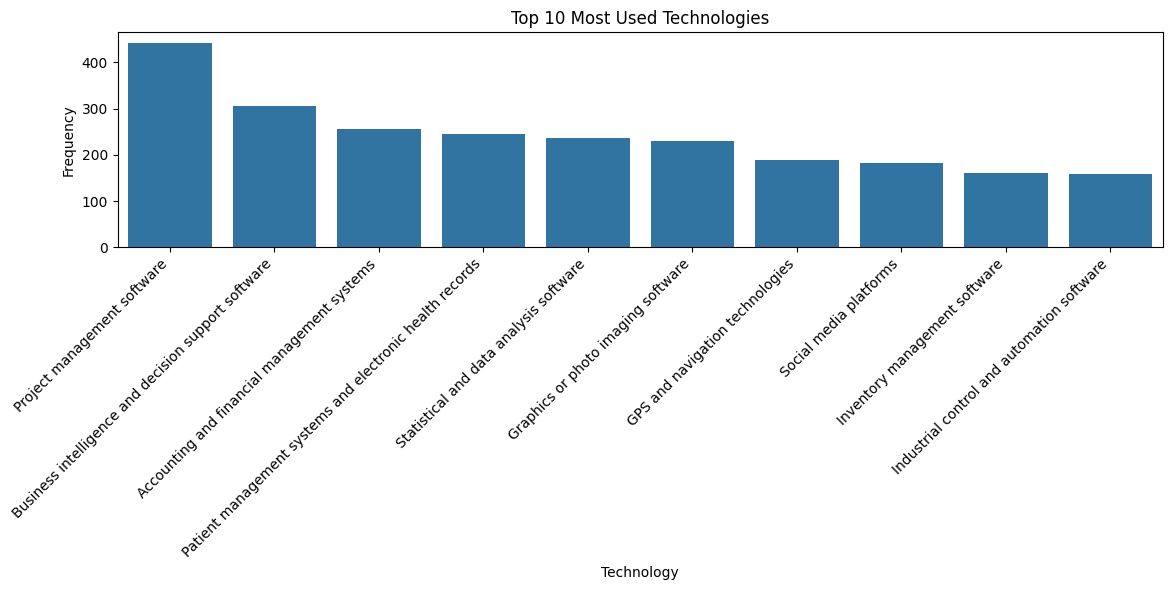

In [ ]:
# prompt: write code to show the top 10 most used techonology in bar char

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_technology_df' is your merged DataFrame
# and 'Technology Tool' column contains the technology names.

# Count the occurrences of each technology
technology_counts = merged_technology_df['Technology Tool'].value_counts()

# Get the top 10 most frequent technologies
top_10_technologies = technology_counts.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_technologies.index, y=top_10_technologies.values)
plt.xlabel("Technology")
plt.ylabel("Frequency")
plt.title("Top 10 Most Used Technologies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: show me the dimension size of 'Core competencies' and 'Core competency descriptions' based on the common column of ['Core Competency', 'Score', 'Proficiency Level', 'Anchor Value'] then perform inner merge opperation on them

import pandas as pd
# Identify common columns for the merge operation
common_cols = ['Core Competency', 'Score', 'Proficiency Level', 'Anchor Value']

# Check dimensions before merge
print("Dimensions of 'Core competencies' DataFrame:", core_competencies_df.shape)
print("Dimensions of 'Core competency descriptions' DataFrame:", core_competency_descriptions_df.shape)

# Perform inner merge
merged_competencies_df = pd.merge(core_competencies_df, core_competency_descriptions_df, on=common_cols, how='inner')

# Check dimensions after merge
print("Dimensions of merged DataFrame:", merged_competencies_df.shape)


Dimensions of 'Core competencies' DataFrame: (11030, 8)
Dimensions of 'Core competency descriptions' DataFrame: (100, 5)
Dimensions of merged DataFrame: (11030, 9)


In [ ]:
merged_competencies_df.info()
merged_competencies_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code             0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Core Competency Description  11030 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 775.7+ KB


,0
Occupation Type,0
ANZSCO Code,0
Sub-Profile Code,11030
ANZSCO Title,0
Core Competency,0
Score,0
Proficiency Level,0
Anchor Value,0
Core Competency Description,0


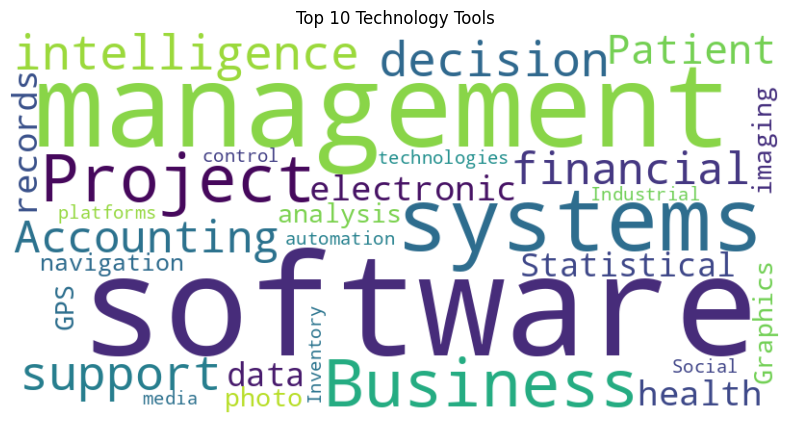

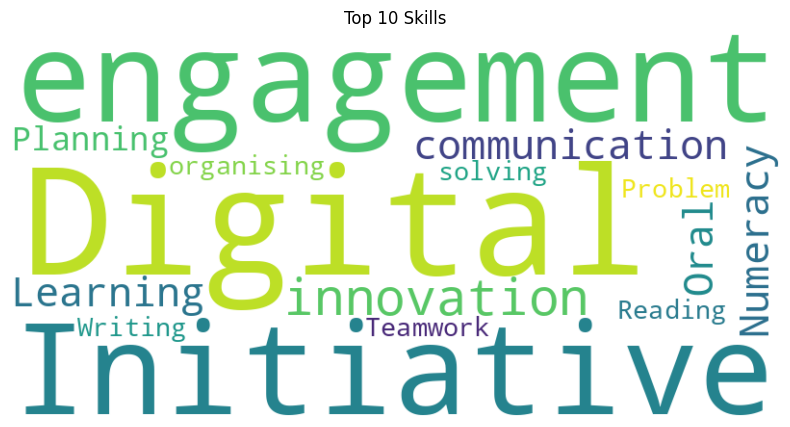

In [ ]:
# prompt: creat wordcloud for top 10 skills, and Technology Tools

# Install wordcloud library if not already installed
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'merged_technology_df' and 'merged_competencies_df' are already defined from your previous code

# ... (Your existing code to load dataframes and create merged_technology_df and merged_competencies_df) ...


# Create wordcloud for top 10 technologies
top_10_tech_text = " ".join(merged_technology_df['Technology Tool'].value_counts().head(10).index)
wordcloud_tech = WordCloud(width=800, height=400, background_color='white').generate(top_10_tech_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tech, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Technology Tools')
plt.show()


# Create wordcloud for top 10 skills (assuming 'Core Competency' column represents skills)
top_10_skills_text = " ".join(merged_competencies_df['Core Competency'].value_counts().head(10).index)
wordcloud_skills = WordCloud(width=800, height=400, background_color='white').generate(top_10_skills_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_skills, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Skills')
plt.show()


In [ ]:
# prompt: show me the dimension size of 'Specialist tasks data' and  'Specialist tasks hierarchy' based on the common column of ['Specialist Task', 'Specialist Cluster', 'Cluster Family', 'Skill Statement']
#  then perform inner merge opperation on them

import pandas as pd
# Identify common columns for the merge operation
common_cols = ['Specialist Task', 'Specialist Cluster', 'Cluster Family']

# Check dimensions before merge
print("Dimensions of 'Specialist tasks data' DataFrame:", specialist_tasks_data_df.shape)
print("Dimensions of 'Specialist tasks hierarchy' DataFrame:", specialist_tasks_hierarchy_df.shape)

# Perform inner merge
merged_specialist_tasks_df = pd.merge(specialist_tasks_data_df, specialist_tasks_hierarchy_df, on=common_cols, how='inner')

# Check dimensions after merge
print("Dimensions of merged DataFrame:", merged_specialist_tasks_df.shape)

merged_specialist_tasks_df.info()
merged_specialist_tasks_df.isnull().sum()

Dimensions of 'Specialist tasks data' DataFrame: (30450, 12)
Dimensions of 'Specialist tasks hierarchy' DataFrame: (1686, 4)
Dimensions of merged DataFrame: (30450, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on fa

,0
Occupation Type,0
ANZSCO Code,0
Sub-Profile Code,23934
ANZSCO Title,0
Specialist Task,0
% of time spent on task,6516
Emerging/\nTrending Flag,29048
Specialist Cluster,0
% of time spent on cluster,6516
Cluster Family,0


<ipython-input-26-9eb11b9dd046>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


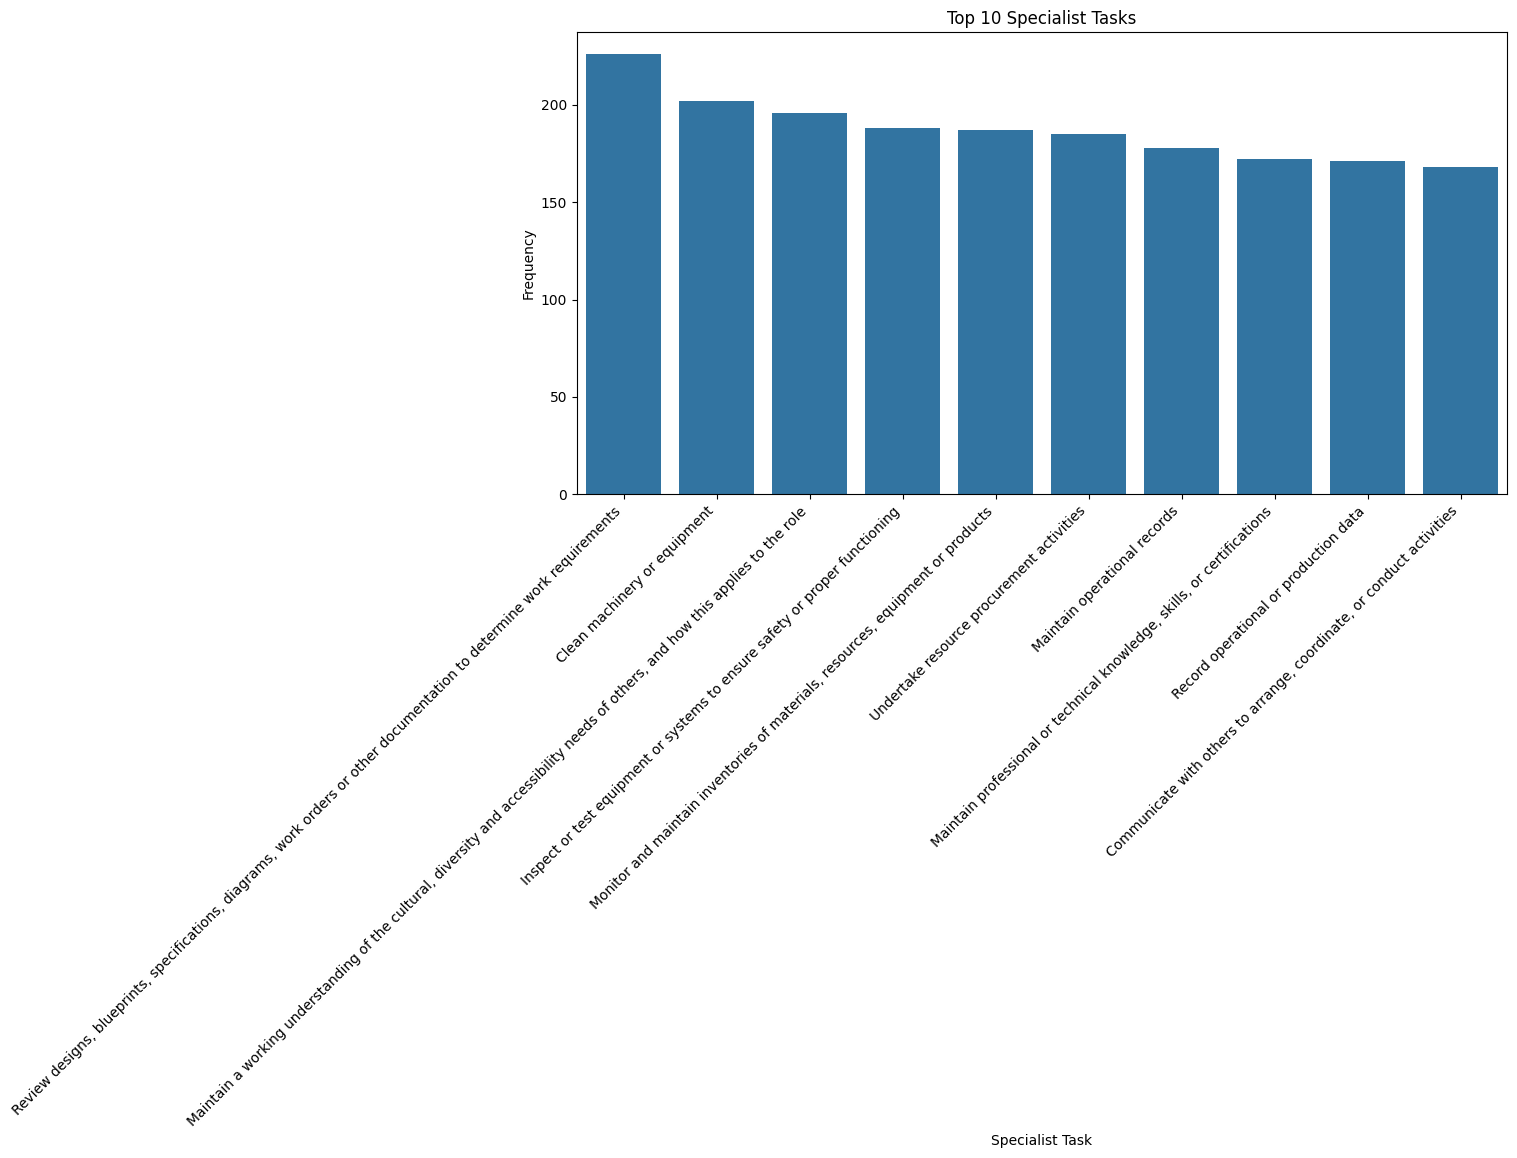

In [ ]:
# prompt: create bar graph to show top 10 specialist task make the bar

import matplotlib.pyplot as plt
# Assuming 'merged_specialist_tasks_df' is your merged DataFrame
# and 'Specialist Task' column contains the specialist tasks.

# Count the occurrences of each specialist task
specialist_task_counts = merged_specialist_tasks_df['Specialist Task'].value_counts()

# Get the top 10 most frequent specialist tasks
top_10_specialist_tasks = specialist_task_counts.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_specialist_tasks.index, y=top_10_specialist_tasks.values)
plt.xlabel("Specialist Task")
plt.ylabel("Frequency")
plt.title("Top 10 Specialist Tasks")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: show the number of duplicate files and drop them

# Find duplicate rows based on all columns
duplicates = occupation_descriptions_df[occupation_descriptions_df.duplicated(keep=False)]

# Print the number of duplicate rows
num_duplicates = len(duplicates)
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicate rows, keeping the first occurrence
occupation_descriptions_df_unique = occupation_descriptions_df.drop_duplicates(keep='first')

# Print the shape of the DataFrame before and after removing duplicates
print(f"Shape of original DataFrame: {occupation_descriptions_df.shape}")
print(f"Shape of DataFrame after removing duplicates: {occupation_descriptions_df_unique.shape}")


Number of duplicate rows: 0
Shape of original DataFrame: (1650, 5)
Shape of DataFrame after removing duplicates: (1650, 5)


next work on tools **bold text**

In [ ]:
# prompt: use TF-IDF and YAKE to identify the key skills

 !pip install yake

import yake

# Get the correct column name for descriptions (Assuming it's the second column)
description_column_name = occupation_descriptions_df.columns[1]

# Access the description text using the correct column name
text = occupation_descriptions_df[description_column_name][0]

# Initialize YAKE keyword extractor
kw_extractor = yake.KeywordExtractor(lan="en", n=3, dedupLim=0.9, top=20, features=None)

# Extract keywords
keywords = kw_extractor.extract_keywords(text)

# Print extracted keywords
print("Keywords extracted by YAKE:")
for kw, score in keywords:
  print(f"{kw}: {score}")


# TF-IDF

# Access descriptions using the correct column name
# Convert the column to string type before creating the list
documents = occupation_descriptions_df[description_column_name].astype(str).tolist()

# Create a TF-IDF vectorizer
# Lower min_df and increase max_df
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.005)  # Adjust parameters as needed
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Function to get top N keywords for a document
def get_top_keywords(document_index, top_n=10):
    tfidf_scores = tfidf_matrix[document_index].toarray().flatten()
    top_indices = tfidf_scores.argsort()[-top_n:][::-1]  # Indices of top N keywords
    top_keywords = [(feature_names[i], tfidf_scores[i]) for i in top_indices]
    return top_keywords

# Example usage: Get top 10 keywords for the first document
top_keywords = get_top_keywords(0, top_n=10)
print("\nKeywords extracted by TF-IDF:")
for keyword, score in top_keywords:
    print(f"{keyword}: {score}")

IndentationError: unexpected indent (<ipython-input-18-47c57a96d7a9>, line 3)

In [ ]:
# prompt: use NER to extract skills job rule and industries

import spacy

# Load a spaCy model with NER capabilities (you might need to download it first: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

# Example usage (assuming 'occupation_descriptions_df' and 'description_column_name' are defined as in your code)
# Get the description text using the correct column name
description_column_name = occupation_descriptions_df.columns[1]

# Process the entire column
for index, description in occupation_descriptions_df[description_column_name].items():
    if isinstance(description, str):  # Check if the value is a string to avoid errors
        doc = nlp(description)
        skills = []
        job_rules = []
        industries = []

        for ent in doc.ents:
          if ent.label_ == "SKILL":
              skills.append(ent.text)
          elif ent.label_ == "ORG": # Organizations can sometimes represent industries or companies related to the job
            industries.append(ent.text)
          # Add more conditions to capture other relevant entities

        print(f"Description {index}:")
        print(f"Skills: {skills}")
        print(f"Industries: {industries}")
        print("-" * 20)


In [ ]:
# prompt: to create create clustering use NMF or lda

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'documents' is your list of occupation descriptions as in the previous code
# documents = occupation_descriptions_df[description_column_name].astype(str).tolist()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2) # Adjust parameters as needed
tfidf_matrix = vectorizer.fit_transform(documents)

# Apply NMF
n_components = 10 # Number of clusters/topics
nmf_model = NMF(n_components=n_components, random_state=42) # Set a random state for reproducibility
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)


# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
      top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
      top_words.append([feature_names[i] for i in top_words_idx])
    return top_words

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(nmf_model, feature_names, n_top_words)

for i, topic_words in enumerate(top_words):
  print(f"Topic {i}: {topic_words}")

# You can now use nmf_matrix for clustering. Each row corresponds to a document,
# and each column represents a topic.
# The values in the matrix indicate the degree to which a document belongs to a topic.


In [ ]:
# prompt: match skills using cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'tfidf_matrix' is your TF-IDF matrix from previous code
# and you have a new job description 'new_job_description'

# Vectorize the new job description
new_job_description_vector = vectorizer.transform([new_job_description])

# Calculate cosine similarity between the new job description and all existing job descriptions
cosine_similarities = cosine_similarity(new_job_description_vector, tfidf_matrix)

# Get the indices of the most similar job descriptions
most_similar_indices = cosine_similarities.argsort()[0][-10:][::-1]  # Top 10 most similar

# Print the most similar job descriptions
print("\nMost Similar Job Descriptions:")
for index in most_similar_indices:
  print(f"Similarity score:{cosine_similarities[0][index]}")
  print(occupation_descriptions_df.iloc[index][description_column_name])
  print("-" * 20)


In [ ]:
# prompt: now show similarity matrix

# Assuming 'tfidf_matrix' is your TF-IDF matrix from previous code

from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print or use the similarity matrix
similarity_matrix


In [ ]:
import pandas as pd
from textblob import TextBlob


# Sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Polarity score

# Apply sentiment analysis
data_cleaned['sentiment'] = data_cleaned['processed'].apply(get_sentiment)

# Plotting sentiment distribution
data_cleaned['sentiment'].plot(kind='hist', title='Sentiment Distribution')


In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Tokenization for Word2Vec training
data_cleaned['tokens'] = data_cleaned['processed'].apply(lambda x: x.split())

# Train Word2Vec model
model = Word2Vec(sentences=data_cleaned['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Average vectors for each document
vocabulary = set(model.wv.index_to_key)
features = [average_word_vectors(tokenized_sentence, model, vocabulary, 100) for tokenized_sentence in data_cleaned['tokens']]
feature_matrix = np.array(features)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(feature_matrix)

# Function to find similar skills
def find_similar_skills(skill_index, similarity_matrix, top_n=5):
    skill_similarities = similarity_matrix[skill_index]
    similar_indices = np.argsort(-skill_similarities)[1:top_n+1]
    similar_scores = [(data_cleaned.iloc[i]['Unnamed: 1'], skill_similarities[i]) for i in similar_indices]
    return similar_scores

# Example: find skills similar to the first entry
similar_skills = find_similar_skills(0, similarity_matrix, top_n=5)
print(f"Skills similar to '{data_cleaned.iloc[0]['Unnamed: 1']}':")
for skill, score in similar_skills:
    print(f"{skill}: {score:.2f}")

In [ ]:
def prepare_skill_matching(df1, df2, column_name='skill_name'):
    # Vectorize skill names
    vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
    tfidf = vectorizer.fit_transform(pd.concat([df1[column_name], df2[column_name]]))

    # Compute cosine similarity matrix
    sim_matrix = cosine_similarity(tfidf, tfidf)

    # Matching logic: match skills with highest similarity score
    matches = []
    for i in range(len(df1)):
        sim_scores = sim_matrix[i, len(df1):]
        top_match = sim_scores.argmax()
        if sim_scores[top_match] > 0.8:  # Threshold for matching
            matches.append((df1[column_name].iloc[i], df2[column_name].iloc[top_match]))
    return matches

# Example usage
matches = prepare_skill_matching(asc_df, esco_df)
print(matches)

In [ ]:
def find_unique_skills(df1, df2, matches):
    df1_skills = set(df1['skill_name'])
    df2_skills = set(df2['skill_name'])
    matched_skills = set([m[0] for m in matches])

    unique_df1 = df1_skills - matched_skills
    unique_df2 = df2_skills - matched_skills

    return unique_df1, unique_df2

unique_asc, unique_esco = find_unique_skills(asc_df, esco_df, matches)
print("Unique ASC Skills:", unique_asc)
print("Unique ESCO Skills:", unique_esco)

In [ ]:
# Assuming you have a 'demand_score' or similar metric in your data
asc_df['demand_score'].plot(kind='hist', title='ASC Skill Demand Distribution')
esco_df['demand_score'].plot(kind='hist', title='ESCO Skill Demand Distribution')


In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/SFIADataset/sfia-9_current-standard_en_US_250129.csv'
df = pd.read_csv(url)


In [ ]:
import pandas as pd

url = 'https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/SFIADataset/sfia-9_current-standard_en_US_250129.csv'
# Explicitly specify the encoding as 'latin-1' or 'ISO-8859-1'
df = pd.read_csv(url, encoding='latin-1')
df.head()
